# The Brexit vote: A case study in causal inference using machine learning

---




Name: Vishodhan Krishnan

NUID: 002890126

# Abstract

In this notebook, we'll answer the question, "How did the Brexit vote impact exchange rates between the British Pound and US Dollar?".
The Brexit (Britain's exit from the European Union on June 23, 2016) referendum marked a pivotal moment in global economic history, significantly impacting financial markets, particularly exchange rates. While the USD:GBP exchange rate plummeted sharply post-referendum, the EURO:GBP rate did not fluctuate as sharply as the former, which is makes it a compelling control dataset. This study leverages causal inference techniques to disentangle the effects of Brexit from other market fluctuations on the USD:GBP exchange rate. The aim of this study is to identify causal relationships, rather than mere correlations, between political uncertainty, economic indicators, and currency movements.

The analysis will employ advanced causal inference frameworks, including propensity score matching and synthetic control methods, to account for confounders and quantify the isolated impact of Brexit. This project aims to provide a deeper understanding of market dynamics during geopolitical upheavals and contribute to the growing body of knowledge on applying causal inference in economic studies.

Causal inference is needed because we don't have a controlled experiment for this scenario. An ideal experiment contains carefully matched groups, except for the explanatory variable being investigated. Many real-world situations in which we are trying to find meaning don't meet those conditions.
To simulate a controlled environment which was not affected by Brexit, The EURO:GBP exchange rate data will be used to derive the counterfactual: what was expected to happen, had the Brexit vote not occurred. We'll estimate the effect as the difference between the counterfactual and actual time series.



# What is Causality

Causal inference is a fascinating and useful topic in many fields. It is the process of identifying and understanding cause-effect relationships between variables. In many areas of research, including epidemiology, economics, political science, and psychology, causal inference is crucial to understanding the effects of interventions, policies, or programs. Causal inference also helps predict the outcome of changes in variables, which can be especially useful in the design of experiments and in decision-making.

Causal inference is the process where causes are inferred from data and on any type of data as long as there is enough of it, so causality is about interventions, about doing. Whereas standard statistics is about correlations, but they can lead to erroneous assumptions that lead to much worse things. If we start to formalize the use of causality, it is about inferring a treatment or a policy T from an outcome Y.

Let's try to understand causality with an example

Sleeping in shoes causes headaches.

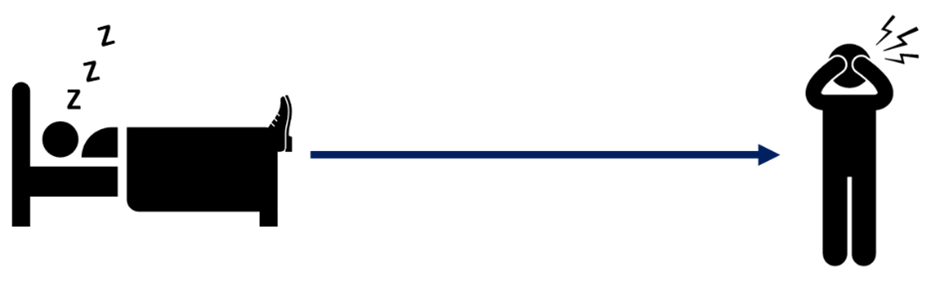

If we look for a reason or cause for this behavior, it could be that we had been drinking the night before.
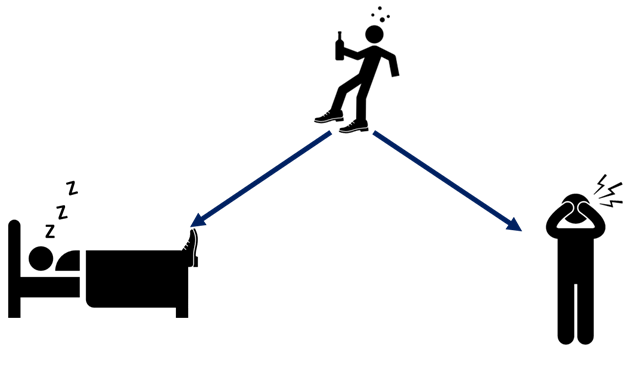

This reason is called **confounding** variable. This variable is related to both the input variable and the output variable in a model and can distort the causal relationship between them. In other words, confounding is a variable that affects both the input variable and the output variable and can give rise to an apparent causal relationship that is actually spurious. Finally, the total association would be:

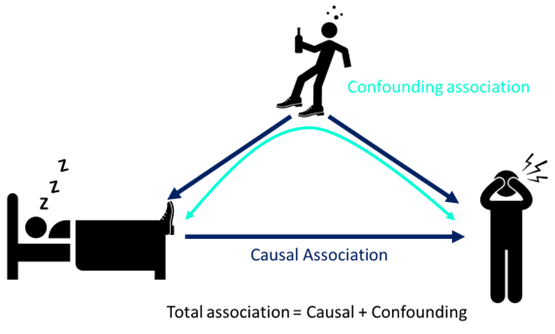



Formally, T causes Y if a change in T causes a change in Y, and holds all else constant. Then, the causal effect is the magnitude by which Y changes by changing one unit in T. Mathematically, this is given by:

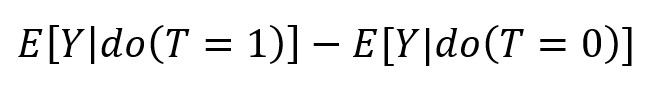


# Causal ML

Now that you've understood how causality works, lets's understand the importance and usage of causality in ML. For this comes Causal ML, an emerging area of research that seeks to improve the ability of machine learning models to capture causal relationships in data. Causal inference in machine learning is based on the idea that correlations between variables are often not sufficient to establish causal relationships, as there may be other variables that influence both.

Machine learning models often rely on correlation learning, i.e., the ability to find patterns in data to make predictions. However, this capability can be limited in situations where a deeper understanding of the underlying causal relationships is required. Causal inference in machine learning seeks to address this limitation by using techniques and algorithms that take into account the causal relationships between variables.

The **goal** of causal inference in machine learning is to **improve the accuracy and interpretability of models**, which can have important implications in areas such as health, economics, policy, and justice. For example, causal inference models can be used to understand the effects of interventions and policies, to control for biases in data, and to provide greater transparency and explainability in automated decisions.

In summary, causal inference in machine learning is an important area of research that seeks to **improve the ability of machine learning models to capture causal relationships in data**. This capability may have important implications in a wide variety of fields, and causal inference in machine learning is expected to continue to be an active area of research in the future.

# Use of Causal ML

Causal ML tries to identify the causes underlying the data, so it can be a technique to increase the personalization of our users. On the other hand, by understanding why a product is used, we can better target it to different individuals.

Thus, some interesting use cases can be:


*   **Improving marketing decision-making:** causal inference can be used to assess the impact of marketing campaigns on customer acquisition or on the loyalty of existing customers. Thus, by understanding the causal relationship between marketing actions and business results, strategies are optimized and ROI is improved.
*   **Operational process optimization:** can be applied to operational processes such as manufacturing or logistics. By understanding the causal relationships between key variables, bottlenecks and areas for improvement in processes can be identified, leading to significant improvements in efficiency and quality.
*  **Fraud prevention:** by analyzing the causal relationships between key variables, suspicious patterns indicating fraud or illegal activities can be identified.

A key benefit of causal ML is that it allows for estimating individualized treatment effects, so that a certain decision can be taken personalized to individual study group.

# How to measure causality


The purest way to establish causation is through a randomized controlled experiment (like an A/B test) where you have two groups — one gets the treatment, one doesn’t. The critical assumption is that the two groups are homogenous — meaning that there are no systematic differences between the two groups (besides one getting the treatment and the other not) that can bias the result.

If the group that gets the treatment reacts positively, then we know there is causation between the treatment and the positive effect that we observe. We know this because the experiment was carefully designed in a way that controls for all other explanatory factors besides the thing we are testing. So any observed difference (that’s statistically significant) between the two groups must be attributable to the treatment.



## Randomized Control Trial

Randomized Controlled Trials (RCTs) are a cornerstone of clinical and experimental research, particularly in the medical, psychological, and social sciences. Their main strength lies in their ability to demonstrate causality, meaning they can show that a specific intervention directly causes an outcome. This is achieved through a rigorous design that involves several key components:


1.   Randomization: Randomization is the process of assigning trial participants to either the treatment group (which receives the intervention) or the control group (which does not receive the intervention or receives a placebo) in a completely random manner. This randomness is crucial because it ensures that each participant has an equal chance of being assigned to either group, thereby minimizing selection bias. Selection bias occurs when the characteristics of the participants in each group affect the outcome independently of the intervention.


2.   Control Group: The control group serves as a benchmark to measure the effects of the treatment. In drug trials, for example, this group might receive a placebo—an inert substance that has no therapeutic effect. Comparing outcomes between the treatment and control groups allows researchers to determine if the intervention has a significant effect beyond that of a placebo or standard treatment.



3.    Blinding: Blinding (or masking) is a method used to prevent participants, and sometimes the researchers themselves, from knowing which group (control or treatment) participants have been assigned to. This helps to prevent bias in reporting and assessing outcomes. Single-blind trials keep the participant unaware, while double-blind trials keep both participants and researchers in the dark regarding group assignments.

4.    Confounding Variables: Confounding variables are factors other than the intervention that might affect the outcome. Because participants are randomly assigned to groups, these variables should be equally distributed among the groups, reducing the risk that they could skew the results. This distribution helps to isolate the effect of the intervention from other factors.

In this notebook, we shall be using the Control group technique to investigate causality. It is important to note that the control group should be selected in such a way that the control group remains unaffected by the confounder.

# Understanding Causality in GBPvsEUR exchange rates

# Context

After the Brexit vote on June 23, 2016, the British Pound (GBP) dropped from 1.48 versus the US Dollar (USD) to 1.36 the following day, and continued to decline.

In contrast, the Euro:USD exchange rate did not change much, despite being highly correlated to the GBP:USD exchange rate. The daily values of the two exchange rates had a Pearson correlation coefficient around 0.75 during the 5 year period prior to the event. So, we'll use the Euro:USD exchange rate as a control.

To estimate the effect, we'll consider the following 4 weeks as the post-treatment period. We could extend this period out further to estimate the full effect. However, the longer of a window we use, other factors come into play, and it becomes more difficult to isolate the effect of the treatment alone.

# Objective

This notebook will use the tabular data forecasting service from Vertex AI to:


*   Train a time-series forecasting model on the British Pound and a related
time-series (Euro) to generate a counterfactual.
*    Answer the question "What would the value of the Pound be, had this event not happened?"
*   Predict the exchange rate during the 30 day period after the Brexit vote on June 23, 2016.
*   Estimate the difference between the actual and counterfactual time series





# Dataset
Board of Governors of the Federal Reserve System (US), retrieved from FRED, Federal Reserve Bank of St. Louis:

* UK / US Exchange Rate - DEXUSUK
* Euro / US Exchange Rate - DEXUSEU

We'll look at answering the question, "How did Brexit impact exchange rates between the British Pound and US Dollar?" using time-series data from FRED.

Finally, we'll use tfcausalimpact to compare our results to a statistical approach. tfcausalimpact is a Python port of the R-based CausalImpact, using TensorFlow Probability.



## Imports

In [ ]:
!pip3 install -U --quiet pandas tfcausalimpact folium imgaug tensorflow pycausalimpact prophet


In [ ]:

import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [ ]:
# Import packages
from causalimpact import CausalImpact
from datetime import timedelta
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

We define below the pre-brexit and post-brexit time periods. This shall be useful to predict the counterfactual data. As Brexit happened on June 23, 2016, the dates have been chosen to split the dataset accordingly to define the vairables PRE_PERIOD and POST_PERIOD. We also define another variable called POST_PERIOD_LENGTH which defines the number of days for which the post-brexit data should be captured. We have chosen to consider the data for 28 days as more data might factor in other irrelevant causes and reasons for fluctuation in the dataset.

In [ ]:
# Set forecasting constants (no need to change these)

# Training data prior to event
PRE_PERIOD=[pd.to_datetime('2012-01-03'), pd.to_datetime('2016-06-23')]

# Duration of period after the event to analyze
POST_PERIOD_LENGTH=28
POST_PERIOD=[pd.to_datetime('2016-06-24'), pd.to_datetime('2016-07-22')]

# Lookback window used for forecasting (usually 1-5x the forecast horizon)
CONTEXT_WINDOW = 1 * POST_PERIOD_LENGTH

In [ ]:
PRE_PERIOD[1]

Timestamp('2016-06-23 00:00:00')

## Read Data

We will import two related time-series from [FRED](https://fred.stlouisfed.org/) (Federal Reserve Economic Data). One is the history of the US Dollar : British Pound exchange rate, and the other is of the US Dollar : Euro. The exchange rate datasets for EURO:GBP and USD:GBP are defined as **DEXUSEU** and **DEXUSUK** respectively.

The data from FRED has to be read though URL parameters as the website does not offer APIs to download the data. Hence, the required paarmeters will be passed in the URL accordingly.

The exchange rate data from  for USUK and USEURO have been extracted as separate dataframes. We shall merge those dataframes based on the timstamp values (which is the index of the dataframe) and rename the column. The index of the merged dataframe will be set to the date column and the null values, if any, are removed

In [ ]:
def read_fred_data(dataset, start_date, end_date):
  url = f'https://fred.stlouisfed.org/graph/fredgraph.csv?id={dataset}&cosd={str(start_date)[:10]}&coed={str(end_date)[:10]}'
  return pd.read_csv(url, index_col='DATE', parse_dates=True, na_values='.')
  # The URL returns CSV data

df_usuk=read_fred_data('DEXUSUK', PRE_PERIOD[0], POST_PERIOD[1])
df_useu=read_fred_data('DEXUSEU', PRE_PERIOD[0], POST_PERIOD[1])

# The CSV data for USEU and USUK will be merged as one dataframe
# The dataset is cleaned by renaming the columns, dropping the NA values and setting the index to the DATE column

df = pd.merge(left=df_useu, left_on=df_useu.index, right=df_usuk, right_on=df_usuk.index).rename(columns={'key_0':'DATE'}).set_index('DATE').dropna()


In [ ]:
df.head(15)


,DEXUSEU,DEXUSUK
DATE,,
2012-01-03,1.3061,1.5655
2012-01-04,1.2930,1.5638
2012-01-05,1.2783,1.5480
2012-01-06,1.2723,1.5431
2012-01-09,1.2745,1.5436
2012-01-10,1.2782,1.5489
2012-01-11,1.2686,1.5325
2012-01-12,1.2818,1.5325
2012-01-13,1.2682,1.5301


We explore and understand the dataset using inbuilt methods to check the datatype, null value counts and the number of records.

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1144 entries, 2012-01-03 to 2016-07-22
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXUSEU  1144 non-null   float64
 1   DEXUSUK  1144 non-null   float64
dtypes: float64(2)
memory usage: 26.8 KB


In [ ]:
df.describe()

,DEXUSEU,DEXUSUK
count,1144.000000,1144.000000
mean,1.245055,1.561584
std,0.103760,0.076603
min,1.052400,1.292100
25%,1.128475,1.520550
50%,1.284700,1.564800
75%,1.330900,1.611650
max,1.392700,1.716500


df.head() revealed that the exchange rates have been captured only on business days/weekdays so we have missing records for the weekends and holidays. We use the pre and post period dates to derive the date range and apply a left join to our dataset

In [ ]:
# Create a dataframe with the complete date range
full_date_range = pd.date_range(start = PRE_PERIOD[0], end = POST_PERIOD[1])
full_dates = pd.DataFrame(full_date_range, columns=['DATE'])

full_dates

# Left join the stock data to the dataframe with the complete date range
df_fixed = full_dates.merge(df, left_on='DATE', right_index=True, how='left')

# # Put the date in the index
df_fixed.set_index('DATE', inplace=True)

print('Shape of data after fixing missing dates:', df_fixed.shape)

Shape of data after fixing missing dates: (1663, 2)


In [ ]:

df_fixed.head(15)

,DEXUSEU,DEXUSUK
DATE,,
2012-01-03,1.3061,1.5655
2012-01-04,1.2930,1.5638
2012-01-05,1.2783,1.5480
2012-01-06,1.2723,1.5431
2012-01-07,NaN,NaN
2012-01-08,NaN,NaN
2012-01-09,1.2745,1.5436
2012-01-10,1.2782,1.5489
2012-01-11,1.2686,1.5325


This looks better than before. Now that we've introduced null values, we use forward and backward fill to replace the null values with the preceding or succeeding day's exchange rate as the exchange rate doesn't change on non-business days

In [ ]:
print(df_fixed.shape)
print(df.shape)

(1663, 2)
(1144, 2)


In [ ]:
ex_data = df_fixed.ffill().bfill()
ex_data.head(15)

,DEXUSEU,DEXUSUK
DATE,,
2012-01-03,1.3061,1.5655
2012-01-04,1.2930,1.5638
2012-01-05,1.2783,1.5480
2012-01-06,1.2723,1.5431
2012-01-07,1.2723,1.5431
2012-01-08,1.2723,1.5431
2012-01-09,1.2745,1.5436
2012-01-10,1.2782,1.5489
2012-01-11,1.2686,1.5325


## Visualize data

To visualize the impact of the missing date values in the dataset, we plot them individually on a yearly basis.

<Axes: title={'center': 'DEXUSUK'}, xlabel='DATE'>

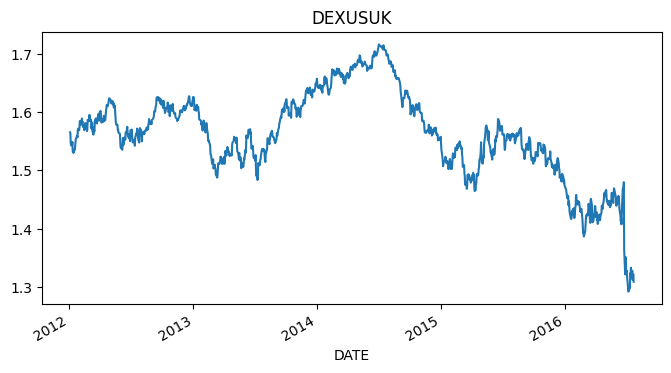

In [ ]:
# Before data cleaning
df['DEXUSUK'].plot(kind='line', figsize=(8, 4), title='DEXUSUK')
# The dip in the bottom shows the impact of Brexit on the exchange rate

<Axes: title={'center': 'DEXUSUK'}, xlabel='DATE'>

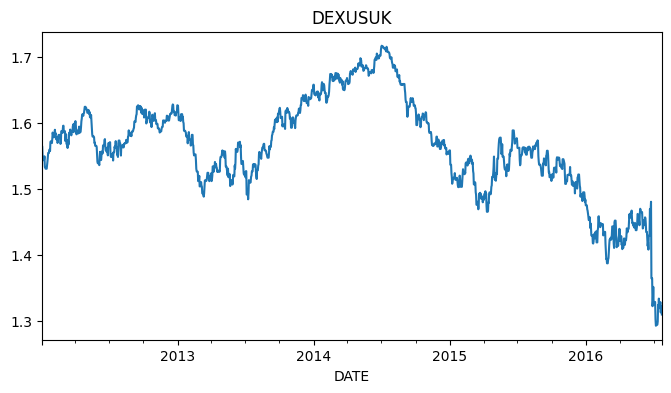

In [ ]:
# After data cleaning
ex_data['DEXUSUK'].plot(kind='line', figsize=(8, 4), title='DEXUSUK')

<Axes: title={'center': 'DEXUSEU'}, xlabel='DATE'>

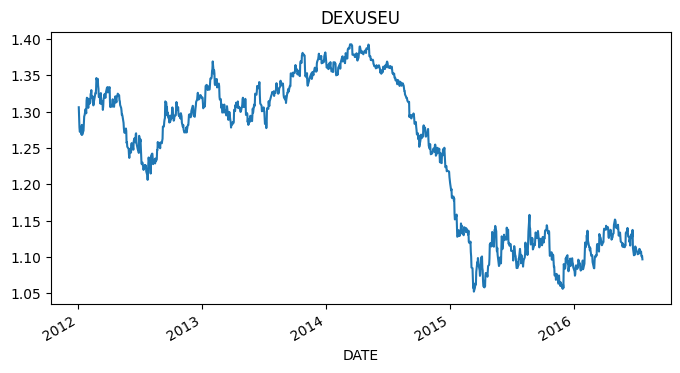

In [ ]:
ex_data['DEXUSEU'].plot(kind='line', figsize=(8, 4), title='DEXUSEU')
# If we look at the data for 2016, the exchange rate has not dipped as much.


We shall now plot both time series: British Pound (`DEXUSUK`) and Euro (`DEXUSEU`) to understand the data.

The shaded area is the four-week "post period," which indicates a drop after the Brexit vote on June 23, 2016.

We will later generate "what would have been" (counterfactual) by learning from the proxy Euro time series.


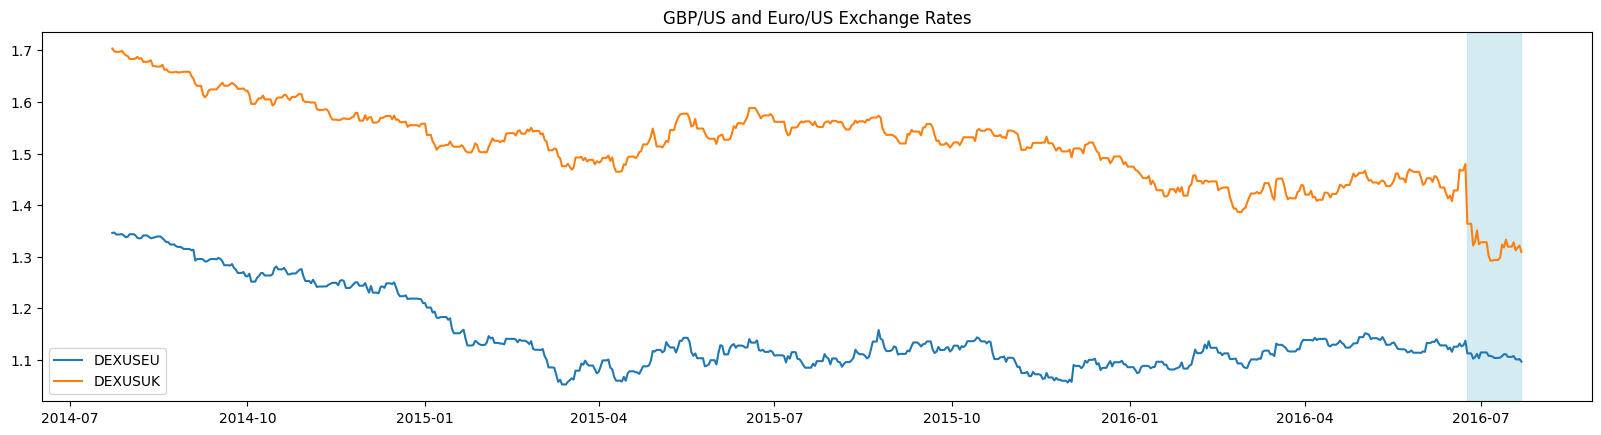

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(ex_data[POST_PERIOD[1] - timedelta(days=730):POST_PERIOD[1]])
ax.axvspan(POST_PERIOD[0], POST_PERIOD[1], alpha=0.5, color='lightblue')

plt.title('GBP/US and Euro/US Exchange Rates')
plt.legend(ex_data.columns)
plt.show()

Calculate the correlation between time series, to validate that an appropriate proxy is being used.

In [ ]:
corr, _ = stats.pearsonr(x=ex_data.DEXUSEU[ex_data.index <= PRE_PERIOD[1]], y=ex_data.DEXUSUK[ex_data.index <= PRE_PERIOD[1]])

print(f'Pearson correlation between time series in the pre-period: {round(corr, 2)}')

Pearson correlation between time series in the pre-period: 0.76


We shall proceed with timeseries forecasting and generating a counterfactual as the data contains only information about the exchange rate data

## Effect estimation using Facebook Prophet
### **What is Facebook Prophet?**

Facebook Prophet is an open-source forecasting tool designed for time series data, developed by the research team at Facebook. It is particularly effective for data that exhibits:

- **Seasonality** (daily, weekly, or yearly patterns).
- **Trend changes** (e.g., sudden shifts in data behavior).
- The presence of **missing values** or **outliers**.

Prophet is designed for non-expert users, offering simplicity and interpretability while delivering robust and accurate forecasts. Its model is based on an additive decomposition of three key components:

1. **Trend**: Captures the overall direction of the data over time.
2. **Seasonality**: Identifies repeating patterns (e.g., yearly fluctuations).
3. **Holidays/Events**: Accounts for anomalies caused by special events or holidays.

### **How Facebook Prophet is Used for Forecasting**

Prophet models time series data by:
- Allowing users to specify seasonality and holidays for better customization.
- Automatically detecting and handling missing data and outliers.
- Providing uncertainty intervals for predictions, offering insights into forecast reliability.

It is well-suited for business use cases such as sales forecasting, web traffic prediction, and demand planning.

---

### **How to Implement Time Series Forecasting Using Facebook Prophet**

#### **1. Data Preparation**
   - **Format the dataset**: The dataset must contain two columns:
     - `ds`: A column for the date or timestamp.
     - `y`: A column for the numeric value you want to forecast (e.g., sales, demand).
   - Ensure that the `ds` column is in a recognizable date format and the `y` column contains numerical data.
   - Handle any missing or null values by imputing or removing them.

#### **2. Model Initialization**
   - Instantiate a Prophet model, which can be customized with additional parameters for:
     - Seasonality (`daily_seasonality`, `weekly_seasonality`, `yearly_seasonality`).
     - Changepoints: Points where the data's trend shifts.
     - Holiday effects: Include a list of holidays/events that may affect the forecast.

#### **3. Fitting the Model**
   - Train the Prophet model by fitting it to the prepared dataset (`ds`, `y`).
   - The model decomposes the data into trend, seasonality, and holiday components during training.

#### **4. Making Predictions**
   - Create a **future dataframe** that specifies the time points you want forecasts for.
   - This dataframe includes both the historical data (for reference) and additional dates for which predictions are required.

#### **5. Generating Forecasts**
   - Use the trained model to predict future values.
   - The output includes:
     - Predicted values (`yhat`).
     - Lower and upper bounds of uncertainty intervals (`yhat_lower`, `yhat_upper`).

#### **6. Evaluating the Forecast**
   - Compare predicted values with actual data (if available) using metrics such as Mean Absolute Error (MAE), Root Mean Square Error (RMSE), or Mean Absolute Percentage Error (MAPE).
   - Visualize the results to assess the quality of the forecasts.

#### **7. Customization and Fine-Tuning**
   - Adjust model parameters, such as:
     - Adding custom seasonalities for better granularity.
     - Modifying changepoint detection to capture trend shifts accurately.
   - Incorporate domain knowledge by explicitly specifying holidays or events.

#### **8. Visualization**
   - Prophet offers built-in functions to visualize:
     - Forecasts and their uncertainty intervals.
     - Decomposition of the trend, seasonality, and holiday effects.

---

In [ ]:
!pip install pycausalimpact prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Filter for AMZN and reset the date index into a column
prophet_data = ex_data['DEXUSUK'].reset_index()

# Columns need to be named 'ds' and 'y' for Prophet
prophet_data.columns = ['ds', 'y']

# Forecasts future values using Prophet model based on pre-period data
prophet_data_pre = prophet_data[prophet_data['ds'] <= PRE_PERIOD[1]]
prophet_data_post = prophet_data[prophet_data['ds'] > PRE_PERIOD[1]]
ph = Prophet()
ph.fit(prophet_data_pre)
forecast_days = 1 + (POST_PERIOD[1] - POST_PERIOD[0]).days
future_prediction = ph.make_future_dataframe(periods=30)
forecast = ph.predict(future_prediction)

# Extracts the trend component from the forecast for further analysis
prophet_trend = forecast[['ds', 'trend']]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4s6gw0wz/rwmb_i77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4s6gw0wz/xneu668m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88909', 'data', 'file=/tmp/tmp4s6gw0wz/rwmb_i77.json', 'init=/tmp/tmp4s6gw0wz/xneu668m.json', 'output', 'file=/tmp/tmp4s6gw0wz/prophet_modelgu6l5g06/prophet_model-20241202060800.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:08:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:08:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
prophet_trend

,ds,trend
0,2012-01-03,1.569314
1,2012-01-04,1.570315
2,2012-01-05,1.571316
3,2012-01-06,1.572317
4,2012-01-07,1.573318
...,...,...
1659,2016-07-19,1.423843
1660,2016-07-20,1.423535
1661,2016-07-21,1.423227
1662,2016-07-22,1.422919


In [ ]:
import seaborn as sns

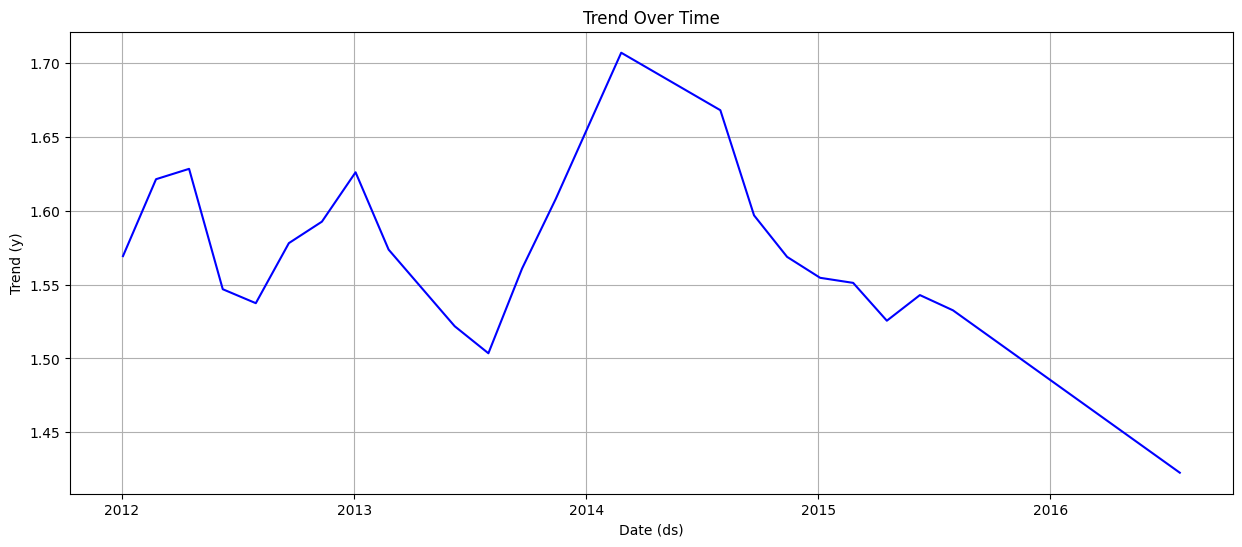

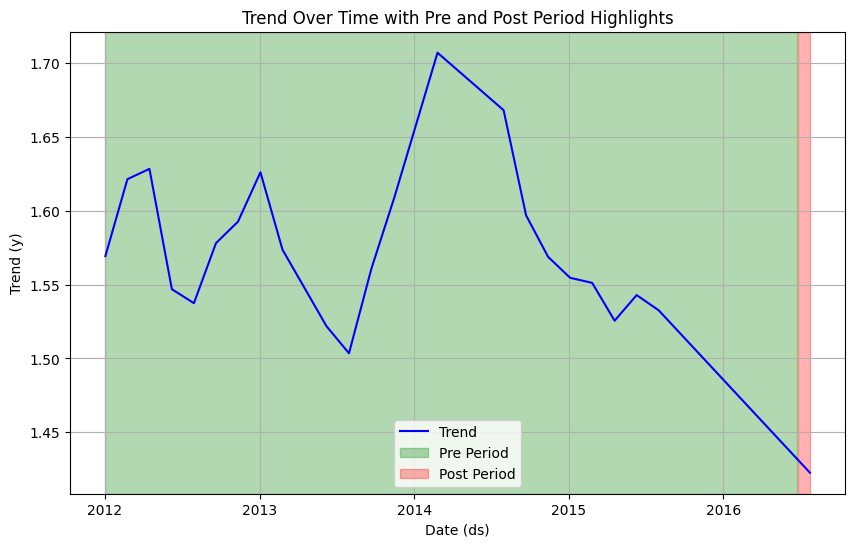

In [ ]:
# Basic Line Plot
plt.figure(figsize=(15, 6))
plt.plot(prophet_trend['ds'], prophet_trend['trend'], color='blue')
plt.title('Trend Over Time')
plt.xlabel('Date (ds)')
plt.ylabel('Trend (y)')
plt.grid(True)
plt.show()

# Advanced Plot with Highlight for Pre and Post Period
plt.figure(figsize=(10, 6))

# Plotting the trend
sns.lineplot(x='ds', y='trend', data=prophet_trend, label='Trend', color='blue')

# Highlighting the pre-period
plt.axvspan(PRE_PERIOD[0], PRE_PERIOD[1], color='green', alpha=0.3, label='Pre Period')

# Highlighting the post-period
plt.axvspan(POST_PERIOD[0], POST_PERIOD[1], color='red', alpha=0.3, label='Post Period')

plt.title('Trend Over Time with Pre and Post Period Highlights')
plt.xlabel('Date (ds)')
plt.ylabel('Trend (y)')
plt.legend()
plt.grid(True)
plt.show()

Interpretation of the Trend:

2012 to Early 2014:

The exchange rate generally exhibits an upward trend, indicating a strengthening currency or a favorable exchange rate over this period.

Mid-2014 to 2016:

The trend shows a sharp decline starting in 2014, suggesting a weakening of the currency or a worsening exchange rate.
This downward trend continues consistently, with minor fluctuations, until the end of the time frame in 2016.

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
# Plot the forecast

ph_forecast = plot_plotly(ph, forecast)
ph_forecast.show()

We  try to come up with the same prediction using Google CausalImpact.

### **What is Google CausalImpact?**

Google's **CausalImpact** is a statistical framework designed to estimate the causal effect of an intervention or event on a time series. It is based on **Bayesian structural time-series models** and can determine the impact of a specific action (such as a marketing campaign or policy change) by comparing the observed post-intervention data to a counterfactual model—what would have happened without the intervention.

The approach leverages:

1. **Pre-intervention data**: Historical data to model the system's behavior before the intervention.
2. **Control time series**: Optional auxiliary series that may correlate with the response variable and help in refining predictions.
3. **Post-intervention data**: Observed data after the intervention to measure its impact.

CausalImpact uses a Bayesian framework to produce probabilistic estimates of the causal effect, providing not only the estimated impact but also uncertainty intervals around those estimates.

---

### **How CausalImpact is Used for Causal Inference**

1. **Establish a Baseline (Counterfactual)**:  
   Using the pre-intervention time series data, the model predicts what the outcome variable would have been if the intervention had not occurred.

2. **Estimate the Effect**:  
   The actual post-intervention data is compared to the predicted counterfactual. Any deviation is attributed to the intervention.

3. **Quantify Uncertainty**:  
   The framework provides confidence intervals around the estimated impact, accounting for variability and uncertainties in the data and model.

---

### **Implementing Time Series Forecasting Using Google Causal Inference**

The process can be broken into the following theoretical steps:

#### **1. Define the Problem and Gather Data**
   - Identify the time series of interest (response variable).
   - Determine the intervention or event to be analyzed (e.g., policy implementation, a marketing campaign).
   - Collect pre-intervention and post-intervention data for the response variable.
   - Optionally, include control variables that are correlated with the response variable but unaffected by the intervention.

#### **2. Preprocess the Data**
   - Ensure the time series data is clean, complete, and properly formatted.
   - Normalize or standardize the data if necessary.
   - Segment the data into **pre-intervention** and **post-intervention** periods.

#### **3. Model the Pre-Intervention Period**
   - Use the pre-intervention data to fit a Bayesian structural time-series (BSTS) model.
   - Incorporate control variables if available to improve the accuracy of the counterfactual predictions.

#### **4. Predict the Counterfactual**
   - Using the fitted model, forecast the response variable for the post-intervention period as if the intervention had not occurred.

#### **5. Compare Observed and Predicted Data**
   - Compute the difference between the observed data and the counterfactual predictions during the post-intervention period.
   - Estimate the average and cumulative effect of the intervention.

#### **6. Evaluate Results**
   - Analyze the results in the context of the intervention.
   - Examine the posterior distribution of the impact estimates and their uncertainty intervals to assess the robustness of the findings.

---

### **Key Theoretical Considerations**

1. **Assumptions**:
   - The response variable's behavior before the intervention is indicative of how it would have behaved after the intervention in the absence of the event.
   - Control time series (if used) must be unaffected by the intervention and correlated with the response variable.

2. **Limitations**:
   - The framework assumes no significant structural changes in the system beyond the intervention.
   - Accuracy depends on the quality of the pre-intervention data and control variables.

3. **Advantages**:
   - Provides rigorous causal estimates rather than mere correlations.
   - Quantifies uncertainty in the estimates, making it robust for decision-making.


In [ ]:
causal_impact = CausalImpact(ex_data['DEXUSUK'], PRE_PERIOD, POST_PERIOD)

/usr/local/lib/python3.10/dist-packages/causalimpact/main.py:603: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

/usr/local/lib/python3.10/dist-packages/causalimpact/main.py:302: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning:

Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: nseasons, standa

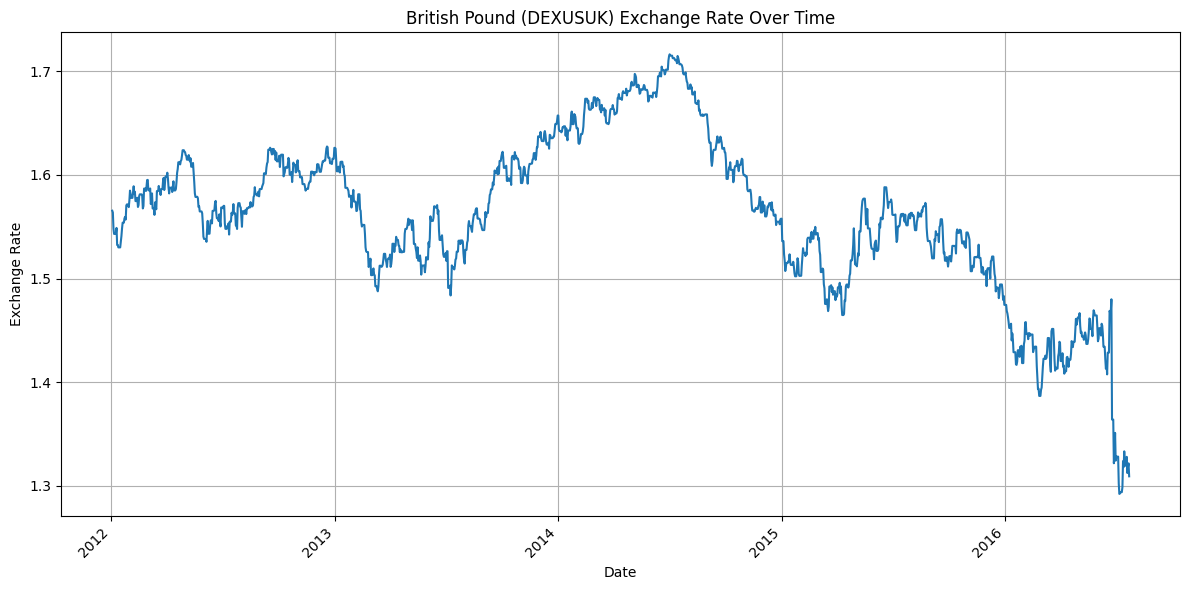

In [ ]:
import matplotlib.pyplot as plt

# Extract dates and values
dates = causal_impact.data['DEXUSUK'].index
values = causal_impact.data['DEXUSUK'].values

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(dates, values)

# Customize the plot
plt.title('British Pound (DEXUSUK) Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [ ]:
print(causal_impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1.32               38.32
Prediction (s.d.)         1.45 (0.0)         41.94 (0.14)
95% CI                    [1.44, 1.46]       [41.67, 42.21]

Absolute effect (s.d.)    -0.12 (0.0)        -3.62 (0.14)
95% CI                    [-0.13, -0.12]     [-3.89, -3.36]

Relative effect (s.d.)    -8.63% (0.32%)     -8.63% (0.32%)
95% CI                    [-9.27%, -8.0%]    [-9.27%, -8.0%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
print(causal_impact.summary('report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1.32. By contrast, in the absence of an
intervention, we would have expected an average response of 1.45.
The 95% interval of this counterfactual prediction is [1.44, 1.46].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is -0.12 with a 95% interval of
[-0.13, -0.12]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 38.32.
By contrast, had the intervention not taken place, we would have expected
a sum of 41.94. The 95% interval of this prediction is [41.67, 42.21].


The above results are given in terms of absolute numbers. In relative
terms, the response variable showe

The causal impact summary highlights the same outcome that had the intervention not occurred, the exchange rate wouldn't have fluctuated and would be in the range of 1.44 and 1.46.

CausalImpact also displays the dip percentage and the statistical significance to the Brexit vote.

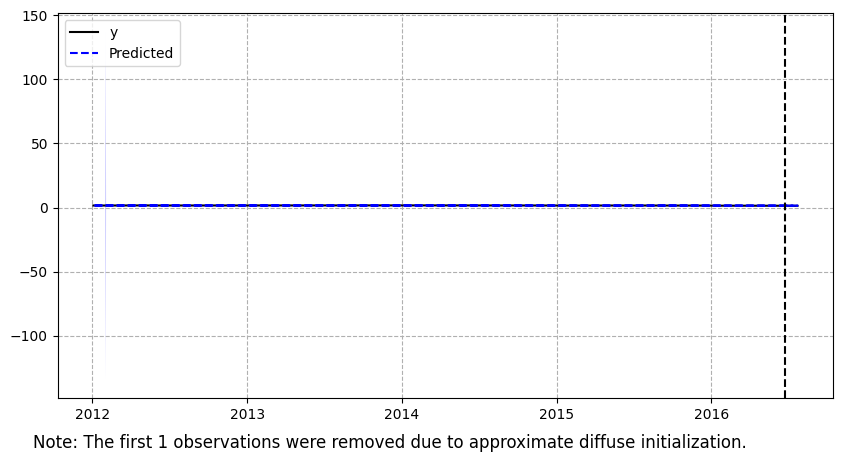

In [ ]:
# This graph shows the empirical and counterfactual data
causal_impact.plot(panels=['original'], figsize=(10,5),)

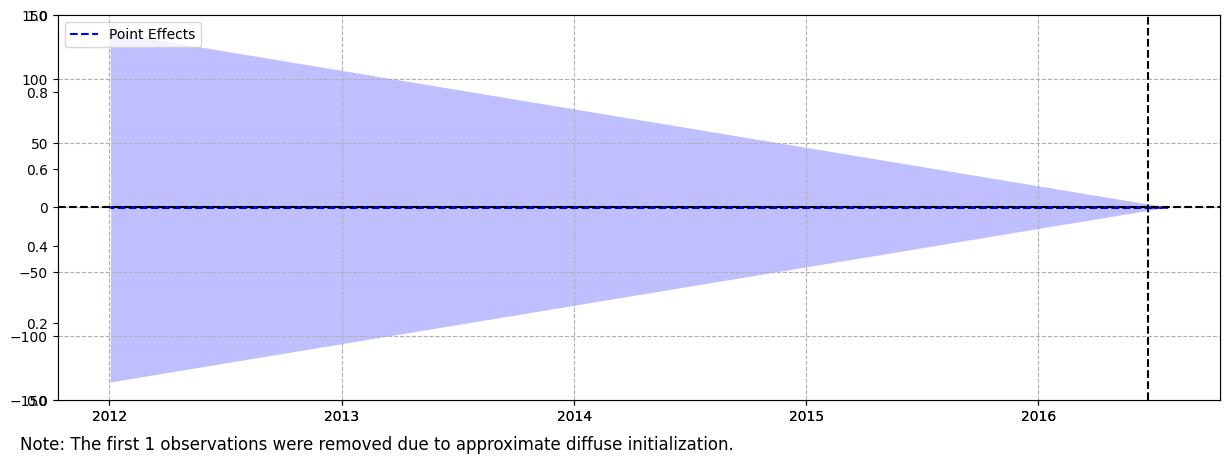

In [ ]:
# This graph shows the difference between the empirical and counterfactual data
causal_impact.plot(panels=['pointwise'], figsize=(15,5))

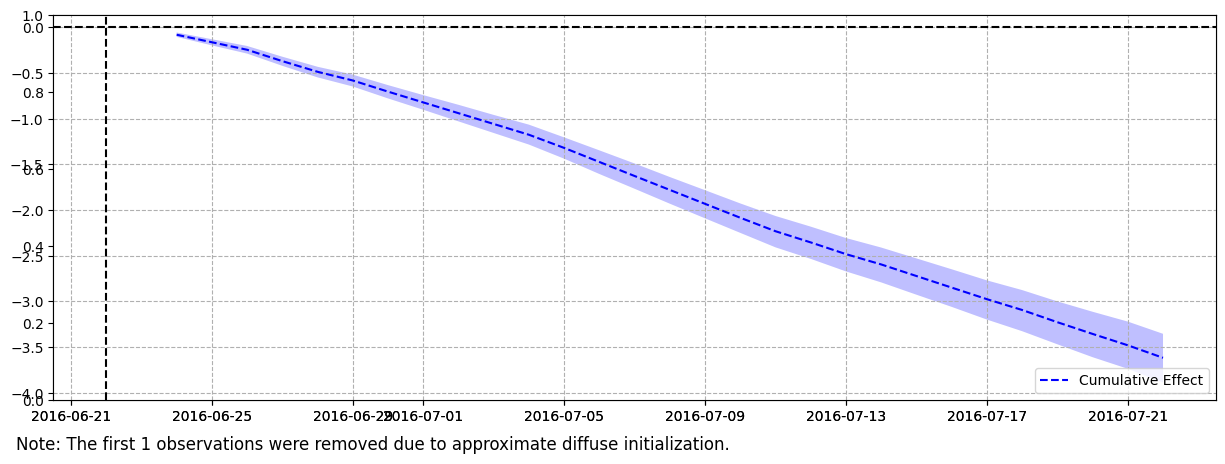

In [ ]:
causal_impact.plot(panels=['cumulative'], figsize=(15,5))


# Conclusion

In conclusion, the analysis effectively demonstrates how statistical models and time series analysis can elucidate the impact of specific events on financial data like stock prices or exchange rates, in this case using GBPvsUSD exchange rate data  as a case study. Through exploratory analysis, and the implementation of enteprise models like Facebook Prophet and Google CausalImpact , it confirms the theory -- had Brexit not occured, the exchange rate of GBPvsUSD would not have dipped below 1.4. This study not only demonstrates how geopolitical factors can have a financial impact as well but also showcases the application of advanced data science modelling and techiques in various domains and usecases.

# References
1. The Brexit vote: A case study in causal inference using machine learning
2. ChatGPT
3. PlainConcepts - Causal ML: What is it and what is its importance?
4. Understanding Causality for Amazon Stock Prices - Utkarsha Shirke

# MIT License

Copyright (c) 2024 Vishodhan Krishnan

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.